In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
mfratio=pd.read_csv(r'C:\Users\RAHUL CHAUHAN\Downloads\BuyerRatio.csv')

In [4]:
mfratio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [5]:
mfratio.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [6]:
East_Mean=mfratio['East'].mean()
West_Mean=mfratio['West'].mean()
North_Mean=mfratio['North'].mean()
South_Mean=mfratio['South'].mean()

In [7]:
print(' East Mean : ',East_Mean,'\n','West Mean : ',West_Mean,'\n','North Mean : ',North_Mean,'\n','South Mean : ',South_Mean)

 East Mean :  242.5 
 West Mean :  832.5 
 North Mean :  743.5 
 South Mean :  410.0


In [8]:
#Null hypothesis : there is no significant differences btw the groups mean lab values.
#Alternative hypothesis : there is a significant differences btw the groups mean lab values.

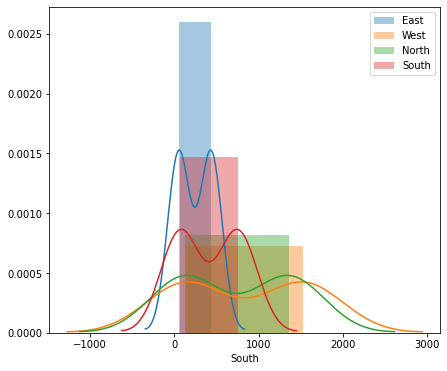

In [9]:
plt.figure(figsize=(7,6))
sns.distplot(mfratio['East'])
sns.distplot(mfratio['West'])
sns.distplot(mfratio['North'])
sns.distplot(mfratio['South'])
plt.legend(['East','West','North','South'])

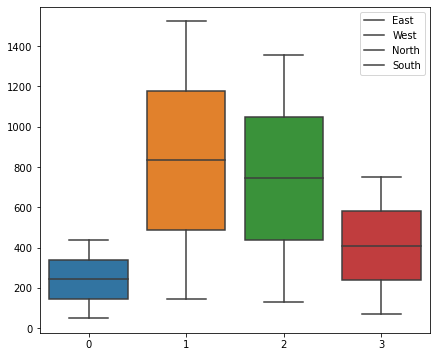

In [10]:
plt.figure(figsize=(7,6))
sns.boxplot(data=[mfratio['East'],mfratio['West'],mfratio['North'],mfratio['South']])
plt.legend(['East','West','North','South'])

In [11]:
alpha=0.05
male=[50,142,131,70]
female=[435,1523,1356,750]
Sales=[male,female]

In [12]:
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [13]:
chiStats=sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-value')
if chiStats[1] < 0.05:
    print('Null hypothesis rejected')
else:
    print('Null Hypothesis accepted')

Test t=1.595946 p-value=0.660309
Interpret by p-value
Null Hypothesis accepted


In [14]:
#critical value = 0.1
alpha = 0.05
# Find the critical value for 95% confidence*
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])                   

In [15]:
observed_chi_val = chiStats[0]
#if observed chi-square < critical chi-square, then variables are not related
#if observed chi-square > critical chi-square, then variables are not independent (and hence may be related).
print('Interpret by critical value')
if observed_chi_val <= critical_value:
     print ('Null hypothesis cannot be rejected')
else:
    print ('Null hypothesis cannot be accepted')

Interpret by critical value
Null hypothesis cannot be rejected


In [16]:
#Hence, proportion of Male-female across regions is same